In [4]:
import pymongo
import pandas as pd
#from pandas import Series
import numpy as np
#import matplotlib.pyplot as plt
#from collections import Counter
#from bson.objectid import ObjectId
import pprint

In [5]:
client = pymongo.MongoClient('localhost',27017)
#client = pymongo.MongoClient('localhost',32768)
db = client.bandhub

In [6]:
songCol = db.get_collection('songsStream')
vidCol = db.get_collection('mergedVideos')
trackCol = db.get_collection('tracksStream')
postCol = db.get_collection('posts')
[songCol.count(), vidCol.count(), trackCol.count(), postCol.count()]

ServerSelectionTimeoutError: localhost:27017: [Errno 111] Connection refused

In [32]:
pubData = []

In [33]:
pointer = songCol.find({'access' : 1})

In [34]:
for songDoc in pointer:
    songId = songDoc['_id']
    postId = postCol.find({'objectId' : songId})
    vidId = vidCol.find({'songId': songId})

In [35]:
pprint.pprint(postId.count())

AutoReconnect: connection closed

In [3]:
pointer = postCol.find({'songAccess':{'$exists': True}}, {'songAccess':1 ,'hasRecordedTracks':1, '_id':0})
count = 0
for docs in pointer:
    if(docs['songAccess'] == 1):
        count = count + 1
pprint.pprint(count)

408353


[Text(0,0.5,u'Number of mixes'), Text(0.5,0,u'Duration in seconds')]

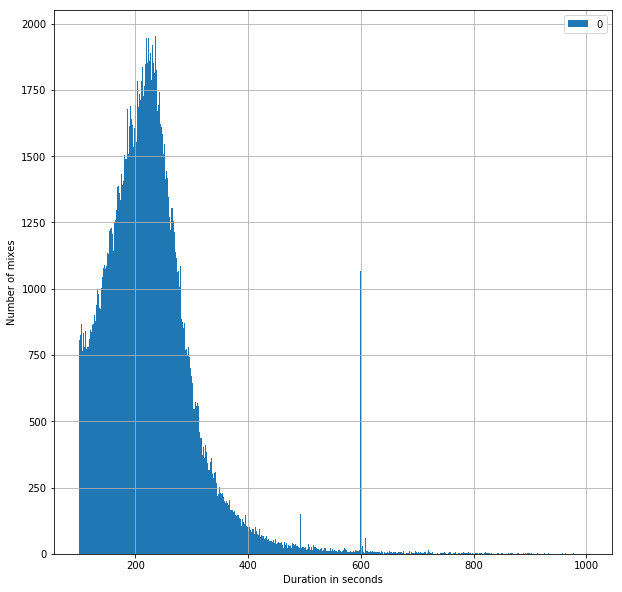

In [8]:
myList = []
pointer = trackCol.find({'durationInSeconds':{'$exists': True}}, {'durationInSeconds':1 , '_id':0})
for docs in pointer:
    myList.append(docs['durationInSeconds']) 

#pointer.next


df = pd.DataFrame(myList)
ax = df[(df<1000) & (df >= 0)].plot(kind='hist',grid=True,figsize=(10,10),bins = 1000)
ax.set(xlabel="Duration in seconds", ylabel="Number of mixes")


In [3]:
ytList = []
pointer = trackCol.find({'sourceVideoURL':{'$exists': True}}, {'sourceVideoURL':1 , '_id':0})
#pprint.pprint(pointer)
count = 0
for docs in pointer:
    #pprint.pprint(docs)
    #ytList.append(docs['sourceVideoURL'])
    if docs['sourceVideoURL'] == None:
        ytList.append(0)
    else:
        ytList.append(1)

#pprint.pprint(ytList)

In [ ]:
df = pd.DataFrame(ytList)
ax = df.plot(kind='bar',grid=True,figsize=(10,10),xticks=range(2)).set(ylabel="Number of published tracks", xlabel="0 - Not YouTube, 1 - From YouTube")

In [3]:
myList = []
pubTracks = postCol.find({'songAccess':{'$exists': True}}, {'participantsInfo':1 ,'songAccess':1, '_id':0})
for docs in pubTracks:
    if(docs['songAccess'] == 1):
        myList.append(len(docs['participantsInfo']['publishedTracks']))
#df = pd.DataFrame(myList)
#ax = df[(df<20) & (df>0)].plot(kind='hist',grid=True,figsize=(10,10),bins=18,xticks=range(20)).set(xlabel="Number of published tracks", ylabel="Number of mixes")


In [4]:
df = pd.DataFrame(myList)

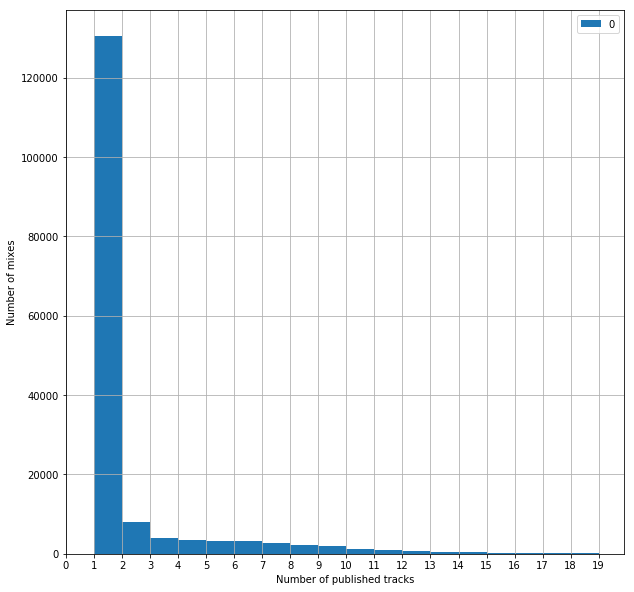

In [5]:
ax = df[(df<20) & (df>=0)].plot(kind='hist',grid=True,figsize=(10,10),bins=18,xticks=range(20)).set(xlabel="Number of published tracks", ylabel="Number of mixes")

In [52]:
pointer = postCol.find()({'collabSettings':{'$exists': True}}, {'collabSettings':1, '_id':0})
for docs in pointer:
    pprint.pprint(docs)

TypeError: 'Cursor' object is not callable

In [54]:
pointer = postCol.find()[5]
for docs in pointer:
    pprint.pprint(docs)

u'owner'
u'relevantProUsers'
u'youtubeID'
u'ownerIsAlive'
u'mb_artist'
u'relevantUsers'
u'numberOfViews'
u'subTitle'
u'objectId'
u'songAccess'
u'isFeatured'
u'score'
u'type'
u'activities'
u'dateCreated'
u'commentsInfo'
u'hasRecordedTracks'
u'songInvitedUserIds'
u'dateLastModified'
u'title'
u'participantsInfo'
u'ownerId'
u'_id'


In [11]:
#pointer = songCol.find()[15:16]
genreList = []
genre = songCol.find({'channels':{'$exists': True}}, {'channels':1 , '_id':0})
count = 0
for docs in genre:
    count = count + 1
    if len(docs['channels'])>0:
        genreList.append(docs['channels']) 
pprint.pprint(genreList)

[[u'Pop', u'British'],
 [u'American', u'ClassicRock'],
 [u'60s', u'Beatles', u'ClassicRock', u'British'],
 [u'British', u'Pop', u'90s'],
 [u'American', u'Pop'],
 [u'70s', u'British', u'ClassicRock'],
 [u'RnB', u'American', u'60s'],
 [u'70s', u'British', u'ClassicRock', u'HardRock'],
 [u'ClassicRock', u'American', u'70s'],
 [u'AlternativeRock', u'American', u'90s'],
 [u'American', u'Pop'],
 [u'Latin', u'WorldMusic'],
 [u'Jazz', u'OriginalMusic', u'American'],
 [u'OriginalMusic', u'RnB'],
 [u'OriginalMusic', u'British'],
 [u'Argentinos'],
 [u'HardRock', u'British'],
 [u'Indie', u'American'],
 [u'OriginalMusic'],
 [u'Suomi', u'Metal', u'British'],
 [u'OriginalMusic', u'RnB', u'Canadians'],
 [u'Punk', u'British', u'80s'],
 [u'American', u'Canadians', u'AlternativeRock'],
 [u'AlternativeRock', u'Funk', u'American', u'Canadians'],
 [u'Funk', u'AlternativeRock', u'Canadians', u'American'],
 [u'RnB', u'American'],
 [u'AlternativeRock', u'American'],
 [u'AlternativeRock', u'American'],
 [u'90s'

In [12]:
#pointer = songCol.find()[15:16]
genre_set = set()
for g in genreList:
    for _g in g:
        genre_set.add(_g)

In [13]:
len(genre_set)

46

In [15]:
genre.count()

1199

In [19]:
cursor = trackCol.find({'instrumentAssignedBySongOwner' : {'$exists' : True}})
myList = []
for doc in cursor:
    myList.append(doc['instrumentAssignedBySongOwner'])

In [21]:
len(set(myList))

23

In [25]:
instrument_set = list(set(myList))

In [29]:
sorted(zip(instrument_set, np.bincount([instrument_set.index(i) for i in myList])), key=lambda x:-x[1])

[(u'lead-vocals', 450),
 (u'rhythm-guitar', 358),
 (u'bass', 316),
 (u'lead-guitar', 276),
 (u'backing-vocals', 234),
 (u'drums', 228),
 (u'keys-piano', 143),
 (u'percussion', 133),
 (u'mixing', 35),
 (u'synth-effects', 24),
 (u'sax', 20),
 (u'trumpet', 12),
 (u'harmonica', 9),
 (u'flute', 8),
 (u'harp', 6),
 (u'ukulele', 4),
 (u'turntable', 3),
 (u'violin', 2),
 (u'clarinet', 2),
 (u'banjo', 2),
 (u'cello', 2),
 (u'accordion', 1),
 (u'pedal-steel-guitar', 1)]

In [25]:
cursor = trackCol.find({'durationInSeconds':{'$exists': True}}, {'durationInSeconds':1 , '_id':0})
for doc in cursor[1:10]:
    pprint.pprint(doc)

{u'durationInSeconds': 175.5675354003906}
{u'durationInSeconds': 215.087890625}
{u'durationInSeconds': 9.707391738891602}
{u'durationInSeconds': 9.150113105773926}
{u'durationInSeconds': 9.126893043518066}
{u'durationInSeconds': 190.9159240722656}
{u'durationInSeconds': 8.825034141540527}
{u'durationInSeconds': 138.3227233886719}
{u'durationInSeconds': 127.3164596557617}


In [ ]:
pointer = trackCol.find({'durationInSeconds':{'$exists': True}}, {'durationInSeconds':1 , '_id':0})
for docs in 